In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
os.chdir('D:\\prasad\\practice\\My Working Projects\\Sales forecasting')

In [3]:
df=pd.read_csv('sales.csv')

In [4]:
df.head()

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,NaN,2,500,300
1,NaN,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350


In [5]:
df.shape

(6, 4)

In [6]:
df.isnull().sum()

rate                     2
sales_in_first_month     0
sales_in_second_month    0
sales_in_third_month     0
dtype: int64

In [7]:
df['rate']=df['rate'].fillna(0)

In [8]:
df

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350
5,five,550,200,700


In [9]:
rt={0:0,'four':4,'nine':9,'seven':7,'five':5,'zero':0}

In [10]:
df['rate']=df.rate.map(rt)

In [11]:
df

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650
2,4,600,200,400
3,9,450,320,650
4,7,600,250,350
5,5,550,200,700


<AxesSubplot:>

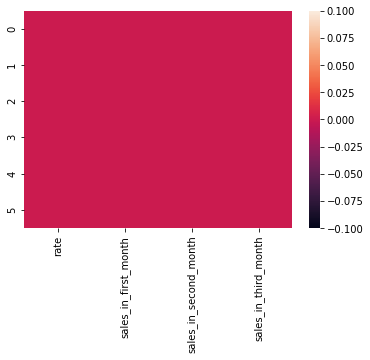

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

rate                     0
sales_in_first_month     0
sales_in_second_month    0
sales_in_third_month     0
dtype: int64

In [14]:
df.dtypes

rate                     int64
sales_in_first_month     int64
sales_in_second_month    int64
sales_in_third_month     int64
dtype: object

### Visualization

In [15]:
df.head(2)

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650


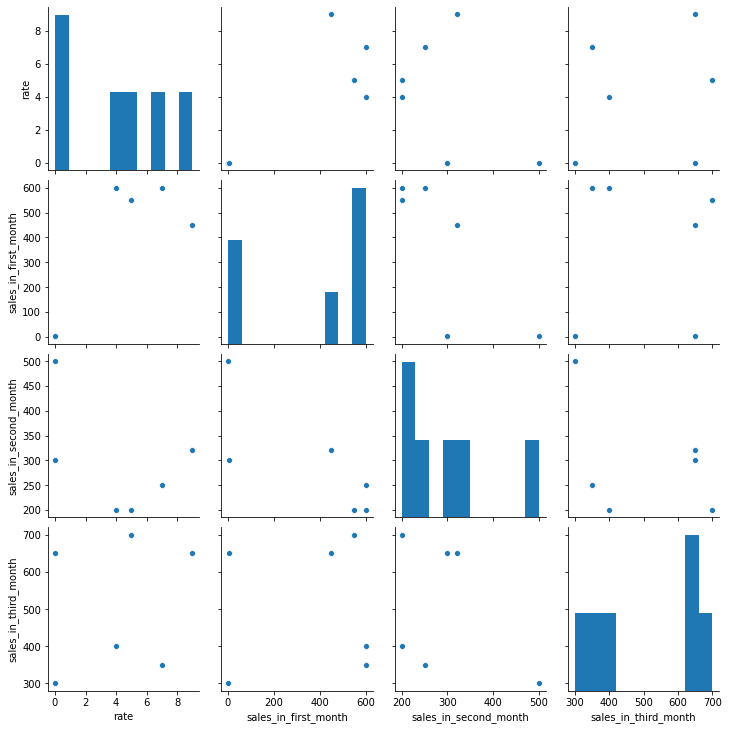

In [16]:
sns.pairplot(df,)

In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
lin_model=LinearRegression()
lin_model.fit(X,y)
y_pred=lin_model.predict(X)
print('r2_score:',r2_score(y,y_pred))

r2_score: 0.6948637514051954


In [20]:
lin_model.score(X,y)

0.6948637514051954

In [24]:
lin_model.predict([[4,600,200]])

array([432.34086597])

In [28]:
data=np.array([9,450,320]).reshape(1,-1)

In [29]:
lin_model.predict(data)

array([617.07715391])

In [30]:
import pickle
import joblib

### Save Model in Pickle & Joblib

In [33]:
pickle.dump(lin_model,open('model.pkl','wb'))

In [34]:
joblib.dump(lin_model,'model.joblib')

['model.joblib']

#### Load Pickle Model

In [35]:
model_pickle=pickle.load(open('model.pkl','rb'))

In [36]:
model_pickle.predict(X)

array([275.03931418, 696.48100776, 432.34086597, 617.07715391,
       485.81693001, 543.24472816])

In [37]:
model_pickle.score(X,y)

0.6948637514051954

In [44]:
model_pickle.predict([[2,2,500]])

array([381.31541122])

In [45]:
model_pickle.predict(data)

array([617.07715391])

#### Load Joblib Model

In [47]:
model_job=joblib.load('model.joblib')

In [48]:
model_job.predict(data)

array([617.07715391])

In [50]:
model_job.score(X,y)

0.6948637514051954